In [1]:
import numpy as np
from utils import load_collector, load_dst_hosts
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# send_ts = np.loadtxt('../host_log/send/send.txt')
# receive_ts = np.loadtxt('../host_log/receive/receive.txt')

In [3]:
def load_md():
    md_df = load_dst_hosts(log_dir='../host_log')
    content = ""
    for i, row in md_df.iterrows():
        content += f"{len(row['path'])},{row['latency']}\n"
    with open('data/INT-MD.csv', 'a') as f:
        f.write(content)


def load_mx():
    mx_df = load_collector(log_dir='../host_log')
    content = ""
    for i, row in mx_df.iterrows():
        content += f"{len(row['path'])},{row['latency']}\n"
    with open('data/INT-MX.csv', 'a') as f:
        f.write(content)

In [4]:
md_df = pd.read_csv('data/INT-MD.csv')
mx_df = pd.read_csv('data/INT-MX.csv')

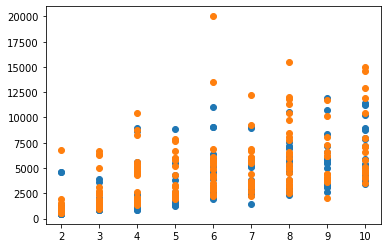

In [5]:
plt.scatter(md_df['len'], md_df['latency'])
plt.scatter(mx_df['len'], mx_df['latency'])

In [18]:
def cal_err(df):
    x, y, yerr = [], [], []
    for l in set(df['len']):
        x.append(l)
        ys = np.array(df[df['len']==l]['latency'])/1000
        y.append(np.mean(ys))
        yerr.append(np.var(ys))
    x = np.array(x) - 1
    return {'x': x, 'y': y, 'yerr': yerr}

Text(0.5, 0, 'hops count')

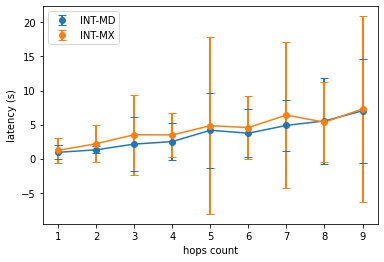

In [19]:
for data, name in [[cal_err(md_df), 'MD'], [cal_err(mx_df), 'MX']]:
    eb = plt.errorbar(**data, fmt='o', elinewidth=2, capsize=4, label=f'INT-{name}')
    plt.plot(data['x'], data['y'], color=eb[0].get_c())
plt.legend()
plt.ylabel('latency (s)')
plt.xlabel('hops count')

'#1f77b4'

In [20]:
y

[928.9655172413793,
 1296.6206896551723,
 2138.4827586206898,
 2500.8275862068967,
 4171.137931034483,
 3729.8275862068967,
 4881.517241379311,
 5531.421052631579,
 7026.0526315789475]

In [21]:
yerr

[1042122.7919143874,
 518934.44233055896,
 3985394.7324613547,
 2761889.866825208,
 5532914.73959572,
 3486089.4530321048,
 3764467.3531510103,
 6372558.349030471,
 7627145.102493075]